# Basics on dual cell spaces

### by M. Wess, 2024
*This Notebook is part of the `dualcellspaces` [documentation](https://ngsolve.github.io/dcm) for the addon package implementing the Dual Cell method in [NGSolve](https://ngsolve.org).*


We start with doing the necessary imports

In [1]:
from ngsolve import *
import dualcellspaces as dcs
from ngsolve.webgui import Draw

The finite element spaces calles `XXPrimalCells`, `XXDualCells`, for the spaces on the primal and dual mesh respectively, where `XX` stands for `H1`, `HCurl`, `HDiv`.

## The space `H1PrimalCells`

First we study the `H1` space on the prmal mesh in two dimensions.

![H1PrimalCells](https://ngsolve.github.io/dcm/_images/mapping_primal_h1.png)

In [2]:
mesh = Mesh(unit_square.GenerateMesh())
Draw(mesh);
h1 = dcs.H1PrimalCells(mesh,order = 1)
print("number of elements in mesh: ", mesh.ne)
print("number of dofs per element: ", int(h1.ndof/mesh.ne))

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

number of elements in mesh:  2
number of dofs per element:  7


Let's take a look at the basis functions:

In [3]:
gfu = GridFunction(h1,multidim = h1.ndof)
for i in range(h1.ndof):
    gfu.vecs[i][i] = 0.2
Draw(gfu, animate = True, min = 0, max = 0.2, intpoints = dcs.GetWebGuiPoints(2),order = 2, deformation = True, euler_angles =[-45,-6,25]);


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'camera': {'euler_angles': [-…

The basis functions are nodal basis functions with respect to a certain integration rule. We may extract the integration rule from the space:

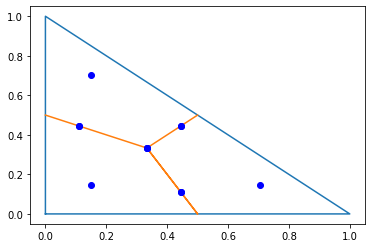

In [4]:
import matplotlib.pyplot as pl
import numpy as np

irs_h1 = h1.GetIntegrationRules()

pl.plot([0,1,0,0],[0,0,1,0]);
pl.plot([0,1/3,0.5,1/3,0.5],[0.5,1/3,0,1/3,0.5]);

trig_points = np.array(irs_h1[TRIG].points)
px,py = trig_points[:,0],trig_points[:,1]
pl.plot(px,py,'ob');

### Exercises
* Play around with orders: how many DoFs per element do you expect for the `H1PrimalCells` space depending on the polynomial order?
* Change the space to `H1DualCells`. How many global DoFs do you expect depending on the polynomial order?

## The space `HCurlDualCells`

We study the `HCurl` space on the prmal mesh in two dimensions.

![H1PrimalCells](https://ngsolve.github.io/dcm/_images/mapping_dual_hcurl.png)

We create the space `HCurlDualCells` on a mesh with more elements to have inner vertices.

In [5]:
mesh_curl = Mesh(unit_square.GenerateMesh(maxh=0.435))
Draw(mesh_curl);
hcurl = dcs.HCurlDualCells(mesh_curl,order = 0)
print("number of (primal) elements in mesh: ", mesh_curl.ne)
print("number of dofs per element: ", hcurl.ndof/mesh_curl.ne)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

number of (primal) elements in mesh:  14
number of dofs per element:  3.5714285714285716


Again we may take a look at the corresponding integration rules:

14 14


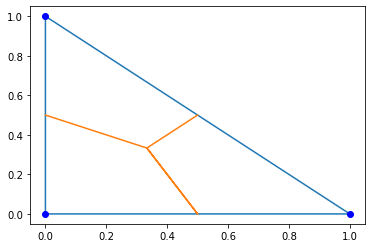

In [6]:
irs_hcurl = hcurl.GetIntegrationRules()

pl.plot([0,1,0,0],[0,0,1,0]);
pl.plot([0,1/3,0.5,1/3,0.5],[0.5,1/3,0,1/3,0.5]);

trig_points = np.array(irs_hcurl[TRIG].points)
px,py = trig_points[:,0],trig_points[:,1]
pl.plot(px,py,'ob');
print(mesh_curl.nface, mesh_curl.ne)

### Exercises
* Play around with orders: how many DoFs per vertex (`Mesh.nv`), edge (`Mesh.nedge`) and faces (in 2d equivalent: `Mesh.ne`, `Mesh.nface`)

## 3d spaces

In three dimensions the spaces are defined similarly. We construct the `HCurl...` spaces.



In [17]:
mesh = Mesh(unit_cube.GenerateMesh())
print("number of elements = {}".format(mesh.ne))
for order in range(5):
    print("###P = {}".format(order))
    print("ndof = {}".format(dcs.HCurlPrimalCells(mesh,order=order).ndof))
    print("{} * 4*(3*P^3+6*P^2+4*P+1)={}".format(mesh.ne,mesh.ne*4*(3*order**3+6*order**2+4*order+1)))

number of elements = 12
###P = 0
ndof = 48
12 * 4*(3*P^3+6*P^2+4*P+1)=48
###P = 1
ndof = 672
12 * 4*(3*P^3+6*P^2+4*P+1)=672
###P = 2
ndof = 2736
12 * 4*(3*P^3+6*P^2+4*P+1)=2736
###P = 3
ndof = 7104
12 * 4*(3*P^3+6*P^2+4*P+1)=7104
###P = 4
ndof = 14640
12 * 4*(3*P^3+6*P^2+4*P+1)=14640


In [18]:
print("number of elements = {}".format(mesh.ne))
for order in range(5):
    print("###P = {}".format(order))
    print("ndof = {}".format(dcs.HCurlDualCells(mesh,order=order).ndof))
    print("2*nedges*(P+1)+6*nfaces*P*(P+1)+12*nelements*P^2(P+1)={}".format(2*mesh.nedge*(order+1)+6*mesh.nface*(order+1)*order+12*mesh.ne*order**2*(order+1)))

number of elements = 12
###P = 0
ndof = 52
2*nedges*(P+1)+6*nfaces*P*(P+1)+12*nelements*P^2(P+1)=52
###P = 1
ndof = 752
2*nedges*(P+1)+6*nfaces*P*(P+1)+12*nelements*P^2(P+1)=752
###P = 2
ndof = 2964
2*nedges*(P+1)+6*nfaces*P*(P+1)+12*nelements*P^2(P+1)=2964
###P = 3
ndof = 7552
2*nedges*(P+1)+6*nfaces*P*(P+1)+12*nelements*P^2(P+1)=7552
###P = 4
ndof = 15380
2*nedges*(P+1)+6*nfaces*P*(P+1)+12*nelements*P^2(P+1)=15380
